In [1]:
# %matplotlib notebook
import matplotlib.pyplot as plt
from game import Game
import numpy as np
import logging

### Single plays

In [7]:
%%time
num_iteration = 10000
moneys = []
for i in range(num_iteration):
    game = Game(players=['basic'],
                start_moneys=[100],
                bet=1,
                number_of_decks=6,
                logging_level='info')
    game.play_game()
    for player in game.players:
        moneys.append(player.moneys)

CPU times: user 32.5 s, sys: 122 ms, total: 32.6 s
Wall time: 32.6 s


CPU times: user 59.2 s, sys: 301 ms, total: 59.5 s
Wall time: 59.5 s


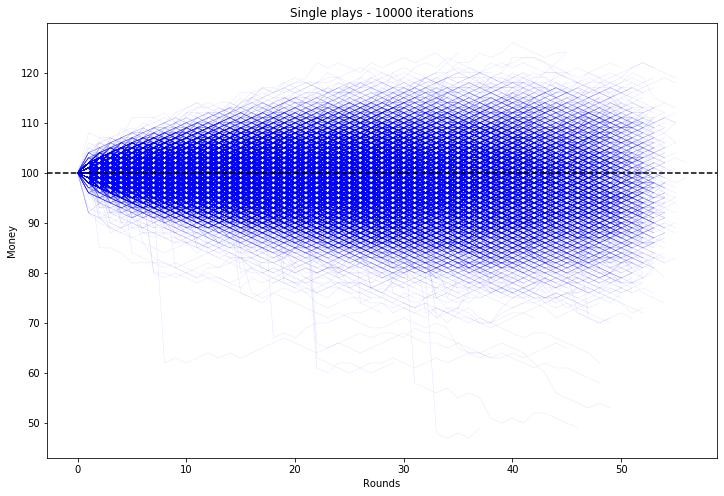

In [8]:
%%time
plt.figure(figsize=(12,8))
for money in moneys:
    plt.plot(money, 'b-', alpha=0.10, linewidth=0.5)
plt.title("Single plays - {} iterations".format(num_iteration))
plt.xlabel("Rounds")
plt.ylabel("Money")
plt.axhline(y=moneys[0][0], color='k', linestyle='--')
plt.savefig("figures/singleplays.png")

### Continues plays

In [21]:
"""
Player continuesly plays (money lingers)
"""
num_iteration = 10000
moneys = [[100]]
for i in range(num_iteration):
    game = Game(players=['basic'],
                start_moneys=[moneys[-1][-1]],
                bet=1,
                number_of_decks=6,
                logging_level='info')
    game.play_game()
    for player in game.players:
        moneys.append(player.moneys)
# discard first element
moneys = moneys[1:]

<IPython.core.display.Javascript object>


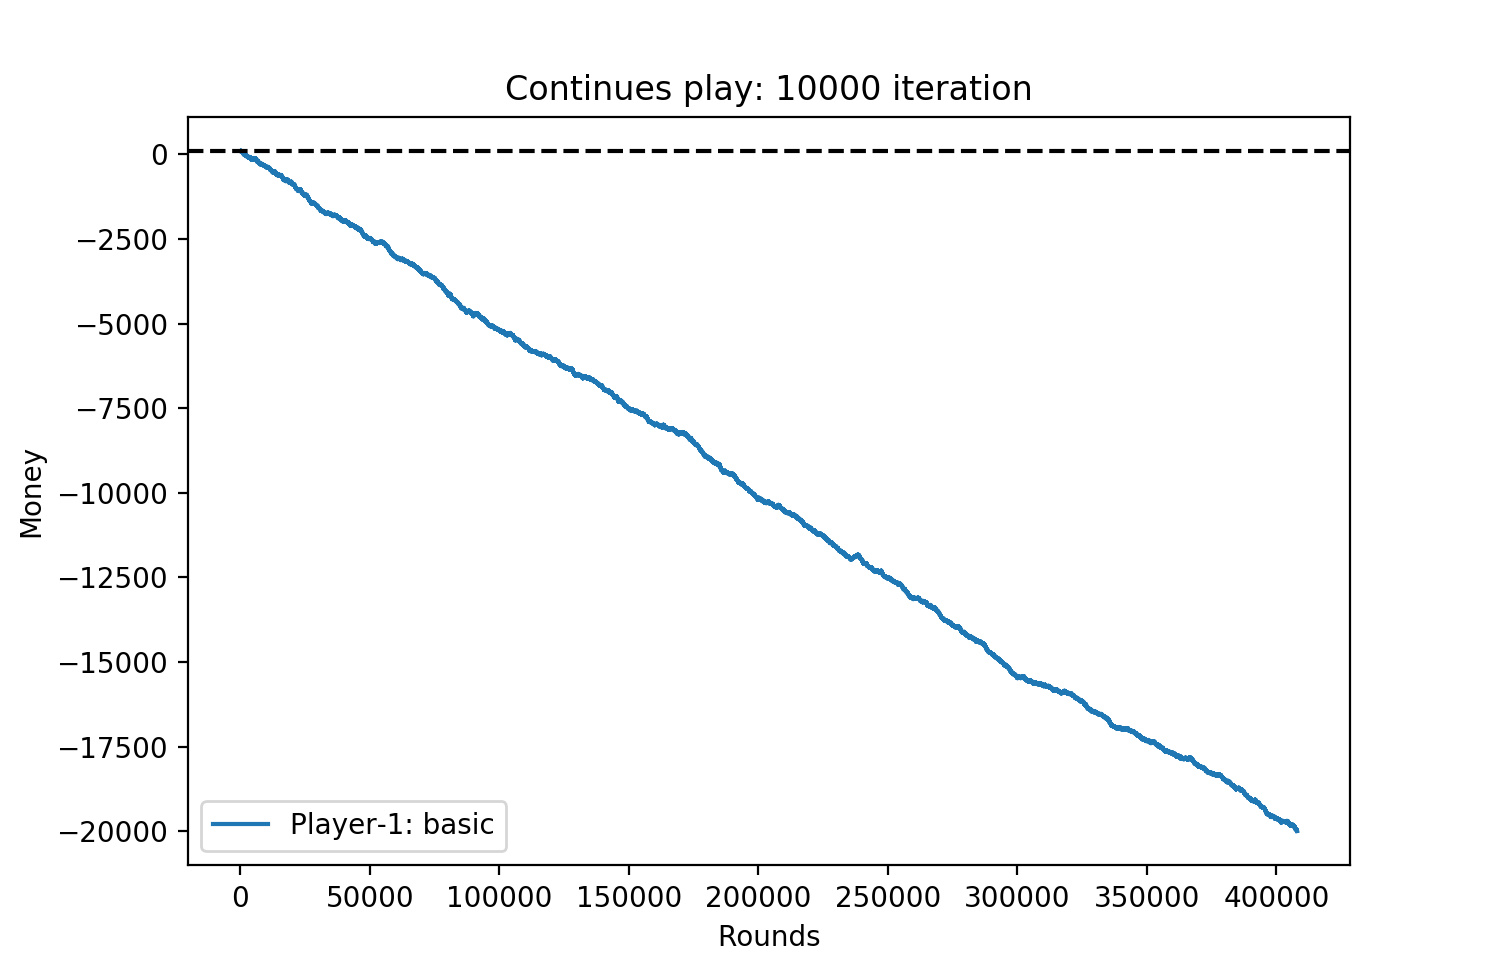

In [22]:
moneys_flat = [m for money in moneys for m in money]
game_finishes = [0]
for money in moneys:
    game_finishes.append(game_finishes[-1]+len(money))
game_finishes = game_finishes[1:]
plt.plot(moneys_flat, label='Player-1: basic')
plt.title("Continues play: {} iteration".format(num_iteration))
plt.legend()
plt.ylabel("Money")
plt.xlabel("Rounds")
plt.axhline(y=moneys_flat[0], color='k', linestyle='--')
# for gf in game_finishes:
#     plt.axvline(x=gf, color='k', linestyle='--')

In [7]:
game_finishes

[0, 38, 69]